### 6.2.1. Data Cleaner App
The first step in an AI pipeline is often to clean the data. This process requires some level of interactivity for the data analyst to understand which variables she is manipulating. Once the input format of the data is fixed, this process can be automated to scale it to the whole dataset.

Let’s take an example with the weather data from chapter 2. In this first example, we will start MATLAB in `-nodesktop` mode (which is the default mode for the engine). In the next two sections, we will use the `-desktop` mode to show how to use the MATLAB desktop to interact with the data, but also connect to an already running MATLAB session.

#### Set up the environment

In [6]:
!git clone https://github.com/hgorr/weather-matlab-python

Cloning into 'weather-matlab-python'...


In [1]:
import matlab.engine
m = matlab.engine.start_matlab()

In [3]:
m.cd('weather-matlab-python') # returns the previous dir location 

'C:\\Users\\ydebray\\Downloads\\python-book-github\\code'

In [4]:
m.pwd()

'C:\\Users\\ydebray\\Downloads\\python-book-github\\code\\weather-matlab-python'

In [5]:
# m.cd('..')

In [6]:
# Make sure that your Python interpreter follows along
import os
os.getcwd()

'c:\\Users\\ydebray\\Downloads\\python-book-github\\code'

In [7]:
os.chdir('weather-matlab-python')

In [8]:
# os.chdir('..')

#### Retrieve Weather Data

In [9]:
import weather
appid ='b1b15e88fa797225412429c1c50c122a1'
json_data = weather.get_forecast('Muenchen','DE',appid,api='samples')
data = weather.parse_forecast_json(json_data)
data.keys()

dict_keys(['current_time', 'temp', 'deg', 'speed', 'humidity', 'pressure'])

In [13]:
print(len(data['temp']))
data['temp'][0:5]

36


[286.67, 285.66, 277.05, 272.78, 273.341]

In [12]:
t = matlab.double(data['temp'])
t

matlab.double([[286.67,285.66,277.05,272.78,273.341,275.568,276.478,276.67,278.253,276.455,275.639,275.459,275.035,274.965,274.562,275.648,277.927,278.367,273.797,271.239,269.553,268.198,267.295,272.956,277.422,277.984,272.459,269.473,268.793,268.106,267.655,273.75,279.302,279.343,274.443,272.424]])

#### (Alternative) Generate synthetic data

In [29]:
from random import random
temp = [10 + 10*random() for _ in range(40)]

In [30]:
# Numpy version
import numpy as np
temp_np = 10 + 10*np.random.rand(1,40)

In [31]:
t = matlab.double(temp)
m.workspace['t'] = t # carrying this variable over to the MATLAB workspace

In [13]:
# Alternative: generate synthetic data directly on the MATLAB side
out = m.evalc('t = 10 + 10*rand(1,40)')
print(out)


t =

  Columns 1 through 11

   10.8552   12.6248   18.0101   10.2922   19.2885   17.3033   14.8861   15.7853   12.3728   14.5885   19.6309

  Columns 12 through 22

   15.4681   15.2114   12.3159   14.8890   16.2406   16.7914   13.9552   13.6744   19.8798   10.3774   18.8517

  Columns 23 through 33

   19.1329   17.9618   10.9871   12.6187   13.3536   16.7973   11.3655   17.2123   11.0676   16.5376   14.9417

  Columns 34 through 40

   17.7905   17.1504   19.0372   18.9092   13.3416   16.9875   11.9781




In [38]:
from datetime import datetime,timedelta
dtime = [datetime(2024,1,1,0,0,0) + timedelta(hours=3*i) for i in range(40)]

In [39]:
dtime[0].strftime('%Y-%m-%d %H:%M:%S')

'2024-01-01 00:00:00'

In [41]:
time = [dt.strftime('%Y-%m-%d %H:%M:%S') for dt in dtime]

In [42]:
data = {'current_time':time,'temp':temp}
data

{'current_time': ['2024-01-01 00:00:00',
  '2024-01-01 03:00:00',
  '2024-01-01 06:00:00',
  '2024-01-01 09:00:00',
  '2024-01-01 12:00:00',
  '2024-01-01 15:00:00',
  '2024-01-01 18:00:00',
  '2024-01-01 21:00:00',
  '2024-01-02 00:00:00',
  '2024-01-02 03:00:00',
  '2024-01-02 06:00:00',
  '2024-01-02 09:00:00',
  '2024-01-02 12:00:00',
  '2024-01-02 15:00:00',
  '2024-01-02 18:00:00',
  '2024-01-02 21:00:00',
  '2024-01-03 00:00:00',
  '2024-01-03 03:00:00',
  '2024-01-03 06:00:00',
  '2024-01-03 09:00:00',
  '2024-01-03 12:00:00',
  '2024-01-03 15:00:00',
  '2024-01-03 18:00:00',
  '2024-01-03 21:00:00',
  '2024-01-04 00:00:00',
  '2024-01-04 03:00:00',
  '2024-01-04 06:00:00',
  '2024-01-04 09:00:00',
  '2024-01-04 12:00:00',
  '2024-01-04 15:00:00',
  '2024-01-04 18:00:00',
  '2024-01-04 21:00:00',
  '2024-01-05 00:00:00',
  '2024-01-05 03:00:00',
  '2024-01-05 06:00:00',
  '2024-01-05 09:00:00',
  '2024-01-05 12:00:00',
  '2024-01-05 15:00:00',
  '2024-01-05 18:00:00',
  '2024-0

#### Format into a Timetable

In [14]:
# Transform into a timetable for data cleaning
m.workspace['data'] = data
m.eval("TT = timetable(datetime(string(data.current_time))',cell2mat(data.temp)','VariableNames',{'Temp'})",nargout=0)

In [15]:
m.who()

['TT', 'data']

On the MATLAB side, creates a timetable:

```
TT = timetable(datetime(string(data.current_time))',cell2mat(data.temp)','VariableNames',{'Temp'})
```
Another alternative is to create a csv file to import from MATLAB

In [ ]:
import csv
with open("data.csv","w") as f:
    write = csv.writer(f,lineterminator = '\n')
    write.writerow(['Time','Temp'])
    write.writerows([[data['current_time'][i],data['temp'][i]] for i in range(36)])

#### Interact manually with the app

In [16]:
m.dataCleaner(nargout=0)

In [ ]:
# In case you need to interact with the MATLAB desktop
m.desktop(nargout=0)

#### Export the cleaning steps

Export the processing steps as a function `preprocess.m`

In [17]:
TT = m.workspace['TT']
TT2 = m.preprocess(TT)
m.parquetwrite("data.parquet",TT2,nargout=0)

<Axes: >

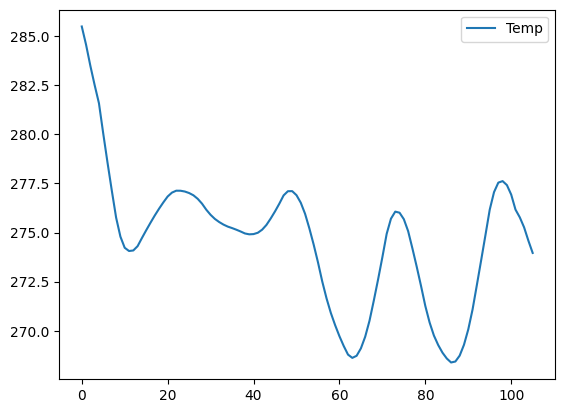

In [18]:
import pandas as pd
pd.read_parquet('data.parquet').plot(y='Temp')

In [19]:
m.exit()